In [249]:
import importlib
import SIPD_utils
importlib.reload(SIPD_utils)
import numpy as np
import matplotlib.pyplot as plt


(600, 1)
(600, 1)
(600, 1)
(600, 1)
(600, 1)
(600, 1)


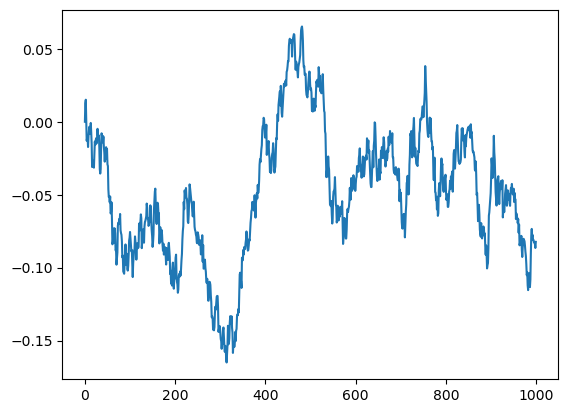

In [347]:
means = np.array([1,2, 2.5, 3.5, 4])
weights = np.array([.3, .1, .1, .2, .3])
variances = np.array([.03, .03, .03, .03, .03])

scale = SIPD_utils.make_scale(means.reshape(-1,1), weights, variances.reshape((5,1,1)))
true_pdf = SIPD_utils.get_pdf(scale, xlist.reshape(-1, 1))

drift = SIPD_utils.gen_drift(noise=.007, trend=0, length=1000)

#drift = (np.arange(3000)*2/3000).reshape(-1,1)


f0=SIPD_utils.gen_f0(scale, drift)
plt.plot(drift)


In [264]:
#plt.plot(f0, 'bo')

In [312]:
p=SIPD_utils.SIPDParams()
p.n_peaks = 5
p.n_reps = 4
p.drift_rate = .006
m = SIPD_utils.SIPD(p)

inferred_scale = m.infer_scale(f0)

inferred_scale.means_

inferred_drift = m.infer_drift(f0, inferred_scale)

#plt.plot(inferred_drift)

m.run(f0)
#plt.plot(drift)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/cannon/opt/miniconda3/envs/jon_current_env/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/ql/bnsc85g513n0k8yvttws51ym0000gn/T/ipykernel_30584/3034038553.py", line 7, in <module>
    inferred_scale = m.infer_scale(f0)
                     ^^^^^^^^^^^^^^^^^
  File "/Users/cannon/Documents/scale-inference-pitch-drift/SIPD_utils.py", line 66, in infer_scale
    scale = GaussianMixture(n_components=self.params.n_peaks, random_state = 0).fit(f0)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/cannon/opt/miniconda3/envs/jon_current_env/lib/python3.11/site-packages/sklearn/mixture/_base.py", line 181, in fit
    self.fit_predict(X, y)
  File "/Users/cannon/opt/miniconda3/envs/jon_current_env/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_met

In [303]:
print(m.all_scales[0].covariances_)

print(scale.covariances_)
print(m.all_scales[-1].covariances_)

print(np.sort(m.all_scales[0].means_))
print(np.sort(m.all_scales[1].means_))
print(np.sort(m.all_scales[-1].means_))
    
xlist = np.arange(0, 6, .01)
pdf_0 = SIPD_utils.get_pdf(m.all_scales[0], xlist.reshape(-1, 1))
pdf_end = SIPD_utils.get_pdf(m.all_scales[-1], xlist.reshape(-1, 1))

plt.plot(xlist, pdf_0 )
plt.plot(xlist, pdf_end )

plt.plot(xlist, true_pdf )
np.shape(true_pdf)

IndexError: list index out of range

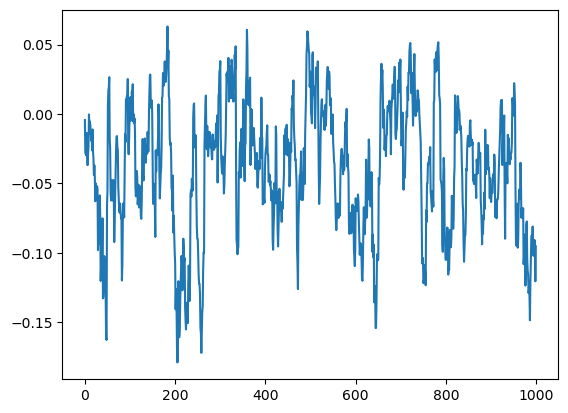

In [344]:

plt.plot(m.all_drift[4])


In [337]:
import csv

f0 = []
t_list = []
with open('Kwaikiutl 2-08 A8_ Whale Song.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        #print(row[0].split(',')[0])
        if row[0].split(',')[1] != '0':
            t_list.append(row[0].split(',')[0])
            f0.append(row[0].split(',')[1])

f0=f0[0::10]
f0 = np.array([np.log(float(i)) for i in f0])
t_list = t_list[0::10]
t_list = np.array([float(i) for i in t_list])
len(f0)

1428

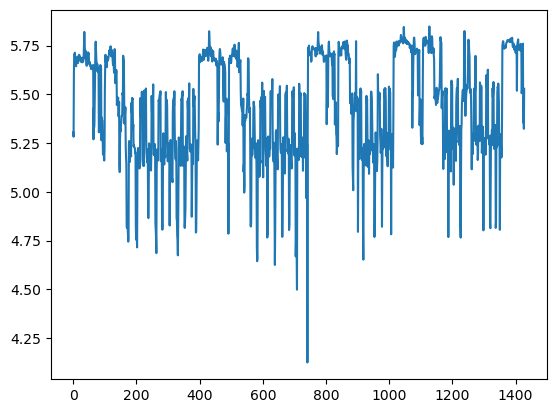

In [338]:
plt.plot(f0)